In [3]:
from keras.datasets import mnist
import cv2
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
from seaborn import heatmap
%matplotlib inline  



(train_images, train_labels), (test_images, test_labels)=mnist.load_data()

train_labels=train_labels.reshape(-1,1)


#encoder=OneHotEncoder()
#train_labels=encoder.fit_transform(train_labels).toarray()
#test_labels=encoder.transform(test_labels)





train_rows=train_images.shape[0]
train_1=train_images.shape[1]
train_2=train_images.shape[2]

train_images=train_images.reshape((train_rows,train_1,train_2,1))
train_images=train_images.astype("float")
train_images=train_images/255


train__rows=test_images.shape[0]
train__1=test_images.shape[1]
train__2=test_images.shape[2]

test_images=test_images.reshape((train__rows,train__1,train__2,1))
test_images=test_images.astype("float")
test_images=test_images/255



Using TensorFlow backend.


In [28]:
from tensorflow.keras.layers import Convolution2D,Flatten,MaxPooling2D,Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
import tensorflow as tf
    
with tf.device('/cpu:0'):
    model=Sequential()
    model.add(Convolution2D(input_shape=(28,28,1),filters=64,kernel_size=3))
    pool=model.add(MaxPooling2D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(128,activation="relu"))
    model.add(Dense(10,activation="softmax"))
    model.compile(optimizer=Adam(lr=0.001),metrics=["accuracy"],loss="sparse_categorical_crossentropy")

    model.fit(train_images,train_labels,epochs=5)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 19s 316us/sample - loss: 0.1636 - accuracy: 0.9507
Epoch 2/5
60000/60000 [==============================] - 18s 303us/sample - loss: 0.0576 - accuracy: 0.9823
Epoch 3/5
60000/60000 [==============================] - 18s 300us/sample - loss: 0.0338 - accuracy: 0.9895
Epoch 4/5
60000/60000 [==============================] - 18s 304us/sample - loss: 0.0235 - accuracy: 0.9922
Epoch 5/5
60000/60000 [==============================] - 18s 302us/sample - loss: 0.0182 - accuracy: 0.9937


In [29]:
model.save_weights("model.h5")
print(pool)

None


'cv2.imshow("image",test_images[0])\ncv2.waitKey()\ncv2.destroyAllWindows()'

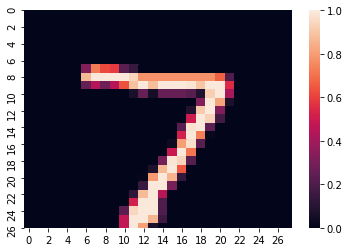

In [20]:
model.predict(test_images)[0]
heatmap(test_images[0].reshape(28,28))

'''cv2.imshow("image",test_images[0])
cv2.waitKey()
cv2.destroyAllWindows()'''

In [28]:
print(np.argmax(model.predict(test_images)[0]))

7


In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D,Flatten,MaxPooling2D,Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential

model=Sequential()
model=model.load_weights("model.h5")

model.compile(optimizer=Adam(lr=0.001),metrics=["accuracy"],loss="sparse_categorical_crossentropy")


model.predict(test_images)[0]
cv2.imshow("image",test_images[0])
cv2.waitKey()
cv2.destroyAllWindows()

C:\Users\pcc\Anaconda3\envs\new\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


ValueError: Weights for model sequential have not yet been created. Weights are created when the Model is first called on inputs or `build()` is called with an `input_shape`.